## Data Cleaning and Analysis Practice

Using a Kaggle dataset on COVID-19 IMPACT to practice data cleaning and analysis with visualizations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/CovidDeaths.csv')

In [21]:
df.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape

(309799, 26)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309799 entries, 0 to 309798
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            309799 non-null  object 
 1   continent                           295057 non-null  object 
 2   location                            309799 non-null  object 
 3   date                                309799 non-null  object 
 4   population                          309799 non-null  int64  
 5   total_cases                         273627 non-null  float64
 6   new_cases                           300906 non-null  float64
 7   new_cases_smoothed                  299642 non-null  float64
 8   total_deaths                        252976 non-null  float64
 9   new_deaths                          301000 non-null  float64
 10  new_deaths_smoothed                 299770 non-null  float64
 11  total_cases_per_million   

In [24]:
df['location'].value_counts()

Argentina          1231
World              1230
Asia               1230
Serbia             1230
Uruguay            1230
                   ... 
Scotland           1145
Wales              1135
Macao               795
Northern Cyprus     691
Western Sahara        1
Name: location, Length: 255, dtype: int64

In [25]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [26]:
df.isna().sum()

iso_code                                   0
continent                              14742
location                                   0
date                                       0
population                                 0
total_cases                            36172
new_cases                               8893
new_cases_smoothed                     10157
total_deaths                           56823
new_deaths                              8799
new_deaths_smoothed                    10029
total_cases_per_million                36172
new_cases_per_million                   8893
new_cases_smoothed_per_million         10157
total_deaths_per_million               56823
new_deaths_per_million                  8799
new_deaths_smoothed_per_million        10029
reproduction_rate                     124982
icu_patients                          273842
icu_patients_per_million              273842
hosp_patients                         273060
hosp_patients_per_million             273060
weekly_icu

In [27]:
df['continent'].value_counts()

Africa           69769
Europe           67112
Asia             61442
North America    50200
Oceania          29377
South America    17157
Name: continent, dtype: int64

Dealing with missing values:
1. Remove the records
2. Replace it with mean/median/mode
3. Use special values such as "unknowns"

For continent, I am going to use "unknowns" to replace the NaNs


In [28]:
df['continent'] = df['continent'].fillna('Unknown')

Check NaNs in the continent column:

In [29]:
df['continent'].isnull().sum()

0

Look into reproduction rate column

In [30]:
df['reproduction_rate'].describe()

count    184817.000000
mean          0.911495
std           0.399925
min          -0.070000
25%           0.720000
50%           0.950000
75%           1.140000
max           5.870000
Name: reproduction_rate, dtype: float64

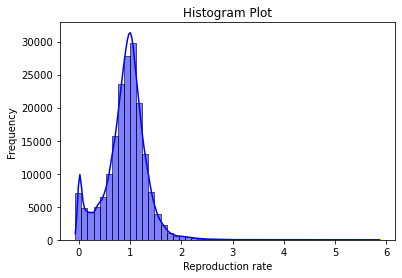

In [31]:
sns.histplot(df['reproduction_rate'], bins=50, kde = True, color = 'blue')
plt.xlabel('Reproduction rate')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()

Looks like the mean is smaller than the median, meaning the distribution is a negatively skewed. Replace NaNs with median for reproduction rate.

In [32]:
rpr_median = df['reproduction_rate'].median()
df['reproduction_rate'].fillna(rpr_median, inplace = True)
df['reproduction_rate'].isnull().sum()

0

### Check total death per continents in a bar chart

<AxesSubplot:xlabel='total_deaths', ylabel='continent'>

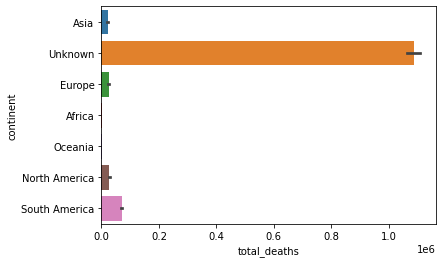

In [34]:
sns.barplot(x = 'total_deaths', y = 'continent', data= df)

Total deaths ranking from high to low: Unknown, South America, Europe, Asia...

### Check the top 10 locations with total deaths

In [43]:
df.groupby('location').agg({'total_deaths': 'sum'}).sort_values(by='total_deaths', ascending = False).head(10)

,total_deaths
location,
World,4.866498e+09
High income,1.975172e+09
Upper middle income,1.892838e+09
Europe,1.422853e+09
North America,1.144531e+09
Asia,1.059454e+09
South America,1.039165e+09
Lower middle income,9.616699e+08
European Union,8.619144e+08


### How has the 'total_cases' count evolved over time globally?

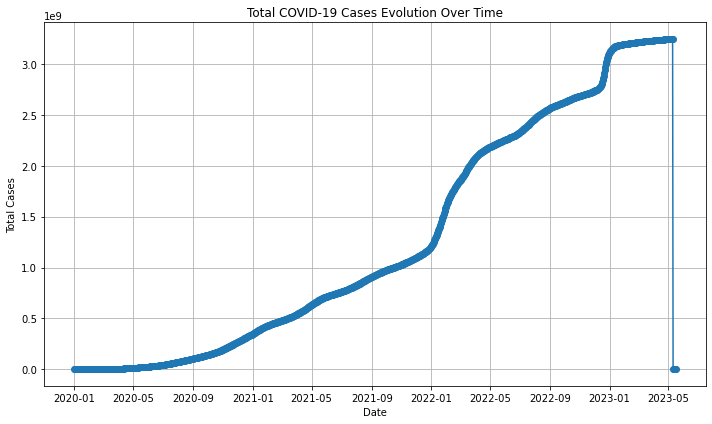

In [4]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'date' and calculate the sum of 'total_cases'
total_cases_by_date = df.groupby('date')['total_cases'].sum()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(total_cases_by_date.index, total_cases_by_date.values, marker='o')

# Customize the plot
plt.title('Total COVID-19 Cases Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### How has the 'reproduction_rate' changed over different time periods?

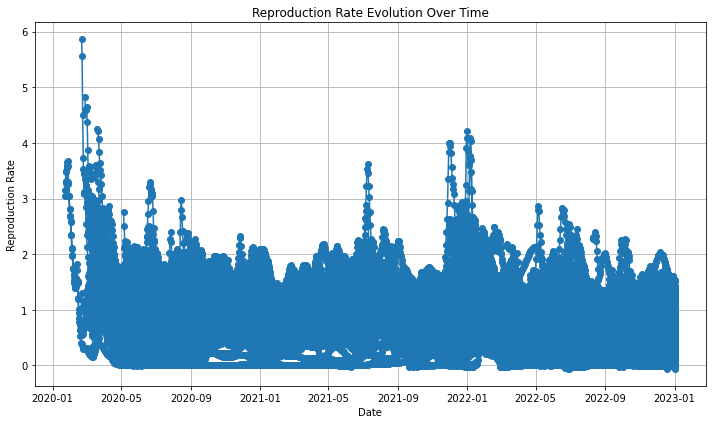

In [6]:
# Create a line plot for 'reproduction_rate' over time
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(df['date'], df['reproduction_rate'], marker='o')

# Customize the plot
plt.title('Reproduction Rate Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Reproduction Rate')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()